In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
import seaborn as sns

In [5]:
df = pd.read_csv("household_electric.csv")
# change data type each atributes
df[[ 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1',
       'Sub_metering_2', 'Sub_metering_3']] = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1',
       'Sub_metering_2', 'Sub_metering_3']].apply(pd.to_numeric, errors='coerce')
data = df.drop('Date', axis=1)
data = df.drop('Time', axis=1)
data = data.dropna()
data = data.reset_index(drop=True)
print(data.dtypes)
data.head(5)
data.isna().sum()

Date                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [6]:
data = data.drop('Date', axis=1)
print(data.dtypes)

# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
 
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
 
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [7]:

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['Global_active_power', 'Global_reactive_power']

In [8]:
print(X_principal)
print(X_principal.shape)
print(X_principal.isna().sum())
print(X_principal.describe())

         Global_active_power  Global_reactive_power
0                   0.999813               0.535337
1                   0.992934               0.481889
2                   0.980336               0.538813
3                   0.976233               0.539824
4                   0.903657               0.699345
...                      ...                    ...
1044501            -0.759191              -0.207551
1044502            -0.765761              -0.205835
1044503            -0.776925              -0.201074
1044504            -0.748599              -0.198232
1044505            -0.746230              -0.198566

[1044506 rows x 2 columns]
(1044506, 2)
Global_active_power      0
Global_reactive_power    0
dtype: int64
       Global_active_power  Global_reactive_power
count         1.044506e+06           1.044506e+06
mean         -2.791815e-17           2.372771e-17
std           6.858376e-01           4.363026e-01
min          -8.168910e-01          -9.384514e-01
25%          -6.26

In [14]:
# Membuat dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_principal[:10000], method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Household")
plt.ylabel("Euclidean Distances")
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering
# Menggunakan cluster = 5
ac = AgglomerativeClustering(n_clusters = 2, metric = "euclidean", linkage = "ward")
ac.fit(X_principal[:10000])

AgglomerativeClustering(metric='euclidean')

In [ ]:
ac.labels_
# Cara lain untuk melihat hasil cluster
# y_pred = ac.fit_predict(X)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [9]:
ac_result = X_principal[:10000].copy()
ac_result["cluster"] = ac.labels_
ac_result.groupby("cluster").mean()

,Global_active_power,Global_reactive_power
cluster,,
0,-0.489085,-0.024088
1,0.802456,-0.061573


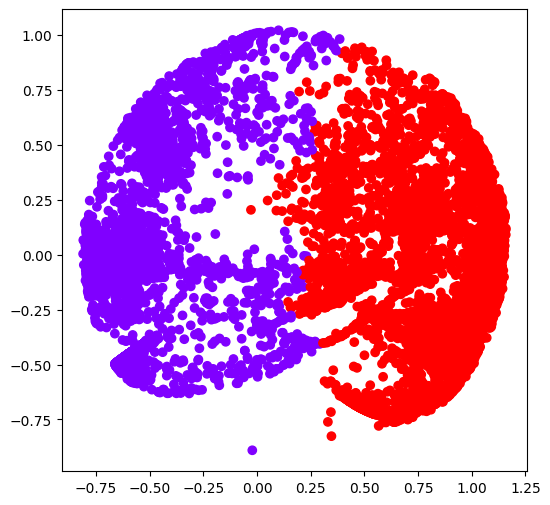

In [ ]:

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['Global_active_power'][:10000], X_principal['Global_reactive_power'][:10000], 
           c = ac.labels_, cmap ='rainbow')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

silhouette = []
for i in range(2, 10):
  agglo = AgglomerativeClustering(n_clusters = i, metric = "euclidean", linkage = "ward")
  agglo.fit(X_principal[:10000])
  score = silhouette_score(X_principal[:10000], agglo.labels_[:10000])
  silhouette.append(score)
  print(i, score)

d:\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


2 0.5793941106716018


d:\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


3 0.5433941208117276


d:\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


4 0.4127788066904547


d:\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


5 0.41985170061630217


d:\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


6 0.4311456586331237


d:\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


7 0.4179737302567767


d:\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


8 0.4418361618547981


d:\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


9 0.44351548925768713


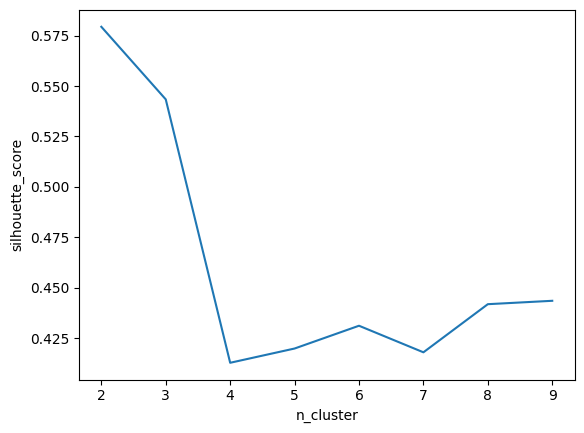

In [ ]:
index = range(2, 10)
plt.plot(index, silhouette)
plt.xlabel('n_cluster')
plt.ylabel('silhouette_score')
plt.show()

In [13]:
X_principal

,Global_active_power,Global_reactive_power
0,0.999813,0.535337
1,0.992934,0.481889
2,0.980336,0.538813
3,0.976233,0.539824
4,0.903657,0.699345
...,...,...
1044501,-0.759191,-0.207551
1044502,-0.765761,-0.205835
1044503,-0.776925,-0.201074
1044504,-0.748599,-0.198232
